In [37]:
# import package yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [7]:
# load dataset

data = pd.read_csv('../data/NFLX.csv')
data = data[['Date', 'Close']]

In [9]:
# manipulasi kolom

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

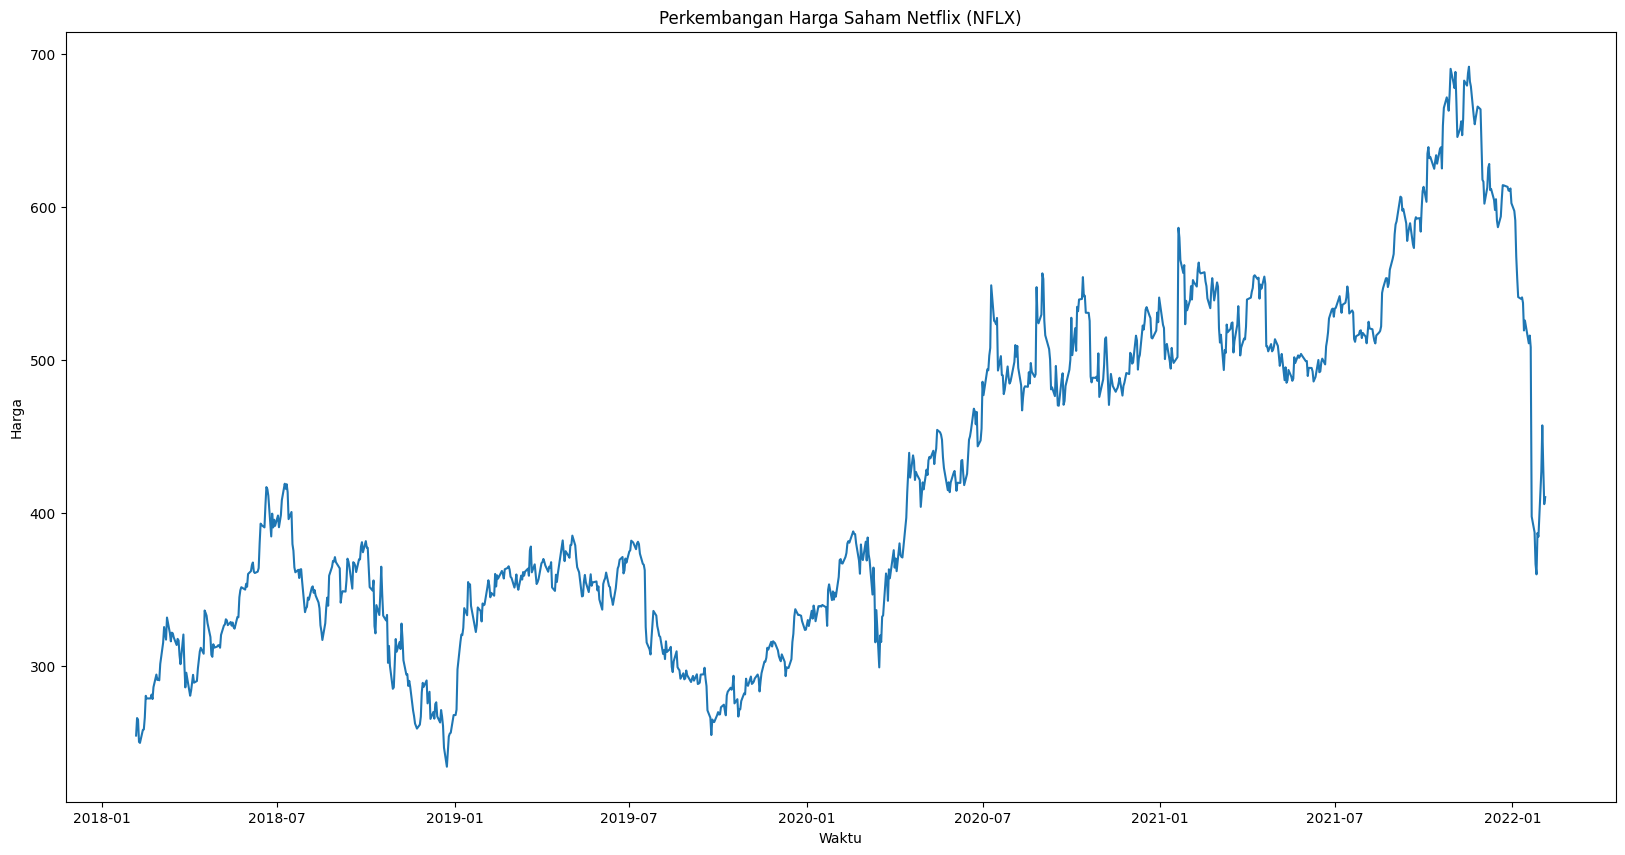

In [29]:
# visualisasi data

plt.figure(figsize=(20,10))
plt.plot(data.index, data['Close'])
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.title('Perkembangan Harga Saham Netflix (NFLX)')
plt.show()

In [30]:
# normalisasi data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

In [33]:
# membuat dataset untuk training model LSTM

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)
  
time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [35]:
# data splitting

split = int(len(X) * 0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [36]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [38]:
model = Sequential([
  Input(shape=(60,1)),
  LSTM(units=50, return_sequences=True),
  LSTM(units=50, return_sequences=False),
  Dense(units=1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0579 - val_loss: 0.0247
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


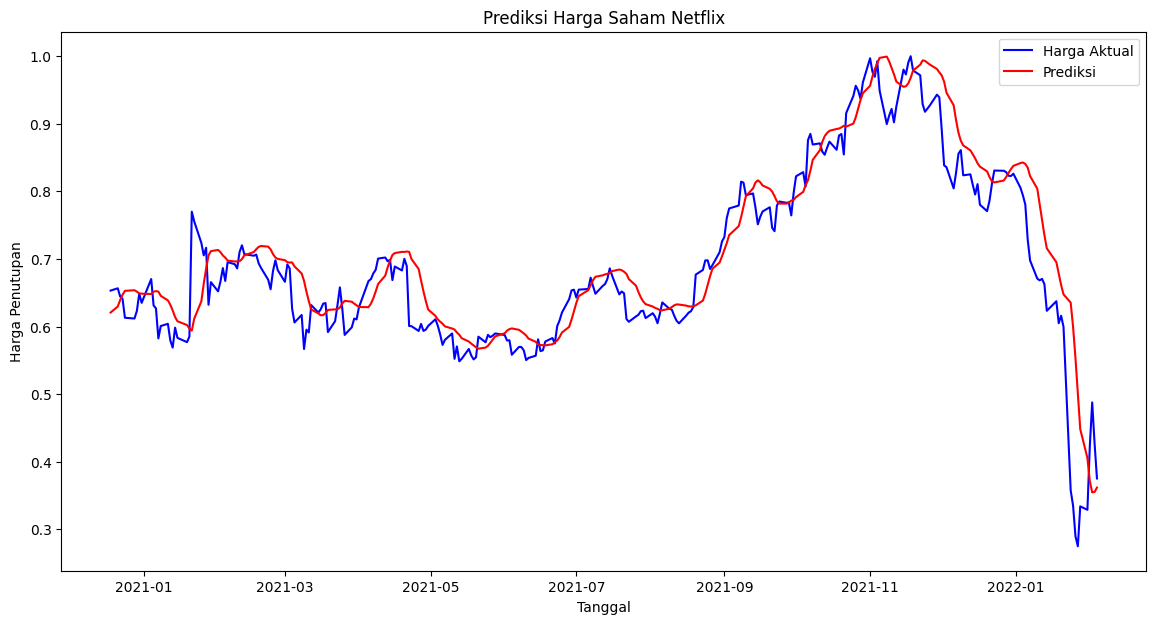

In [39]:
predictions = model.predict(X_test)

plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Harga Aktual')
plt.plot(data.index[-len(predictions):], predictions, color='red', label='Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.title('Prediksi Harga Saham Netflix')
plt.legend()
plt.show()